# Problem statement 7:
## Create a Linear Regression Model using Python/R to predict home prices.The
## objective is to predict the value of prices of the house using the given features in
## the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HousingData.csv')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town.  <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per 10,000 dollar <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - Percentage lower status of the population <br>
MEDV - Median value of owner-occupied homes in 1000's dollars <br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace = True)

In [8]:
df['ZN'].fillna(df['ZN'].mean(),inplace = True)

In [9]:
df['INDUS'].fillna(df['INDUS'].mean(),inplace = True)

In [10]:
df['CHAS'].fillna(df['CHAS'].median(),inplace = True)

In [11]:
df['AGE'].fillna(df['AGE'].mean(),inplace = True)

In [12]:
df['LSTAT'].fillna(df['LSTAT'].mean(),inplace = True)

In [13]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  
5  394.12   5.210000  28.7  
6  395.60  12.430000  22.9  
7  396.90  19.150000  27.1  
8  386.63  29.930000  16.5  
9  386.71  17.100000  18.9

In [15]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.1f');

In [16]:
x = df.drop(['MEDV'],axis = 1)
y = df['MEDV']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [48]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [49]:
xtrain[:1]

array([[-0.406466  ,  0.38294659, -1.14789583, -0.27808871, -0.94042968,
         0.74790526, -1.28280587,  0.11334204, -0.5287244 , -1.14358152,
        -1.66170689,  0.42891632, -1.12273174]])

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [36]:
model.score(xtest,ytest)

0.696645851705674

In [37]:
lm = LinearRegression()

In [38]:
model = lm.fit(xtrain,ytrain)

In [69]:
'''
from sklearn.ensemble import RandomForestRegressor

# Assuming you have defined the variables xtrain, ytrain, xtest

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(xtrain, ytrain)
pred_rfr = rfr.predict(xtest)

# Display the first two predictions
print(pred_rfr[:2])
'''

'\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Assuming you have defined the variables xtrain, ytrain, xtest\n\nrfr = RandomForestRegressor(n_estimators=100)\nrfr.fit(xtrain, ytrain)\npred_rfr = rfr.predict(xtest)\n\n# Display the first two predictions\nprint(pred_rfr[:2])\n'

In [70]:
y_pred = lm.predict(xtest)
#ytest=train_test_split(x,y,test_size=0.2)

/Users/abhimsound/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [72]:
print("Mean Absolute Error(Ytest_pred, Ytest) :", mean_absolute_error(ytest,y_pred))

Mean Absolute Error(Ytest_pred, Ytest) : 10.439217347527652


In [73]:
print("Mean Squared Error(Ytest_pred, Ytest) :", mean_squared_error(ytest,y_pred))

Mean Squared Error(Ytest_pred, Ytest) : 173.3097150666353


In [74]:
print("Root Mean Squared Error(Ytest_pred, Ytest) :", np.sqrt(mean_squared_error(ytest,y_pred)))

Root Mean Squared Error(Ytest_pred, Ytest) : 13.164714773463013


In [75]:
print("R2 Score: ",r2_score(ytest,y_pred))

R2 Score:  -0.7386017201262682


In [67]:
sns.regplot(ytest,y_pred,label="Test Data")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('True vs Predicted Value')
plt.legend(loc="upper left")
plt.plot()
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [68]:
sns.regplot(ytest,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('True vs Predicted Value')
plt.legend(loc="upper left")
plt.plot()
plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [84]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np 
import pandas as pd 

import os
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('HousingData.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(5)

CRIM  ZN  INDUS  CHAS  NOX  \
0  CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA... NaN    NaN   NaN  NaN   
1  0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,... NaN    NaN   NaN  NaN   
2  0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242... NaN    NaN   NaN  NaN   
3  0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242... NaN    NaN   NaN  NaN   
4  0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222... NaN    NaN   NaN  NaN   

   RM  AGE  DIS  RAD  TAX  PTRATIO   B  LSTAT  MEDV  
0 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
1 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
2 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
3 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN  
4 NaN  NaN  NaN  NaN  NaN      NaN NaN    NaN   NaN

In [85]:
print(df.describe().transpose())

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.611874    8.545770    0.00632    0.083235    0.29025   
ZN       506.0   11.211934   22.921051    0.00000    0.000000    0.00000   
INDUS    506.0   11.083992    6.699165    0.46000    5.190000    9.90000   
CHAS     506.0    0.067194    0.250605    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.518519   27.439466    2.90000   45.925000   74.45000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

ValueError: Could not interpret input 'CRIM'

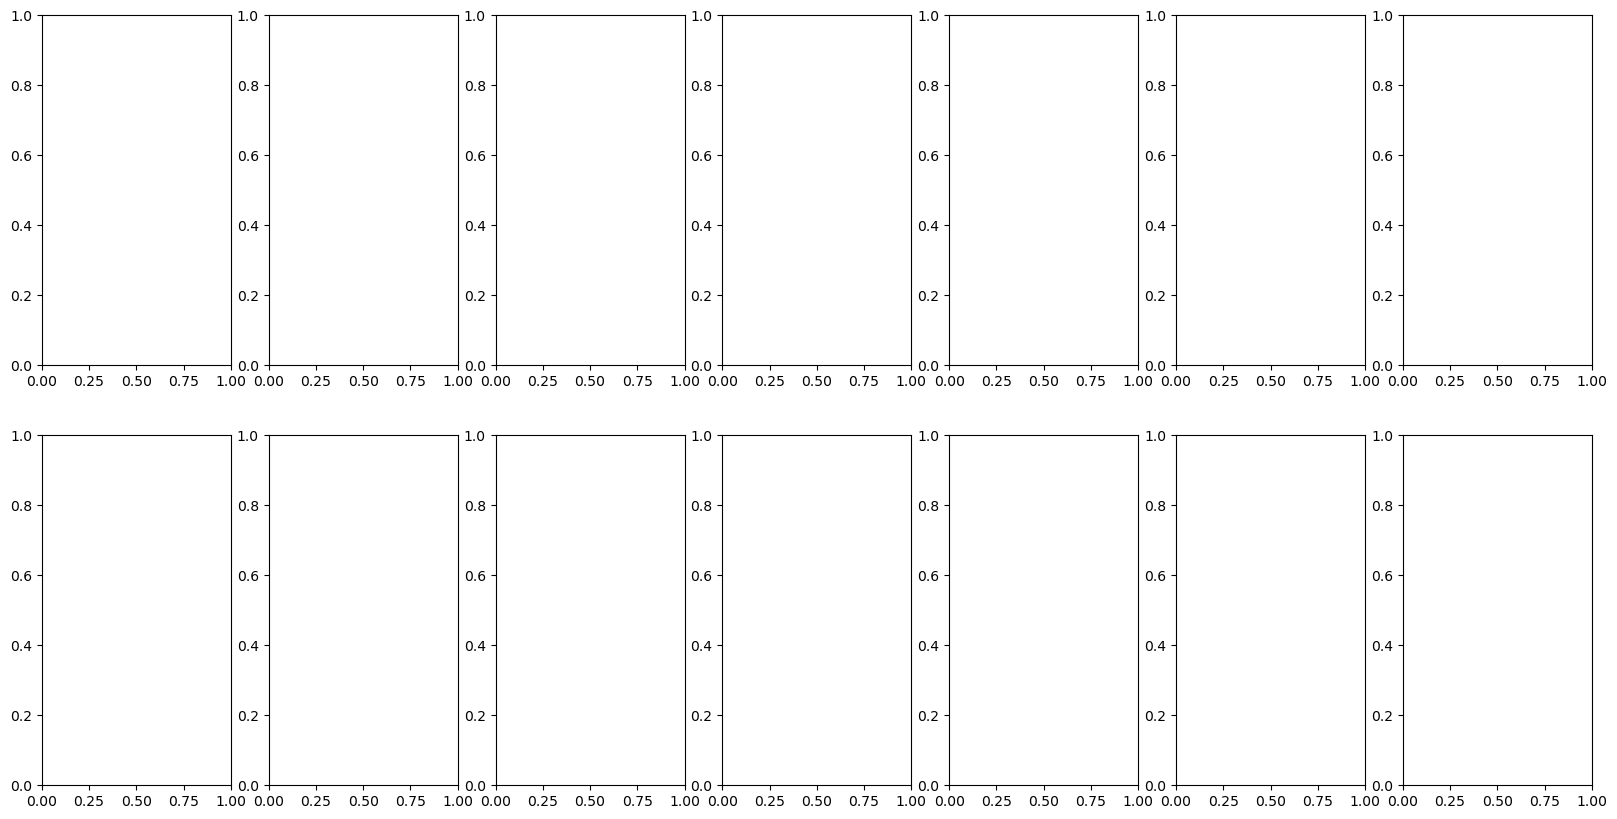

In [87]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col,value in df.items():
    sns.boxplot(y=col, df=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [88]:
    for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [89]:
data = data[~(data['MEDV'] >= 50.0)]
data = data[~(data['CRIM'] >= 88.97)]
data = data[~(data['ZN'] >= 100.0)]
data = data[~(data['B'] >= 396.9)]
print(np.shape(data))

TypeError: '>=' not supported between instances of 'str' and 'float'